## Covid Analysis Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
from sklearn.linear_model import LinearRegression
from sympy import *


%matplotlib inline
plt.rc('font', family='sans-serif')
plt.rc('axes', labelsize=15)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=18)
plt.rc('axes', titleweight='bold')
plt.rc('axes', linewidth=2)
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
def geoid2code(geoid):
    return int(geoid[4:])

# this data set has cumulative stats
nyt_github_covid_cumulative = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/us-counties.csv'
nyt_github_covid_rolling_avg = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/rolling-averages/us-counties.csv'
df = pd.read_csv(nyt_github_covid_rolling_avg,converters=dict(geoid=geoid2code))
df.rename(columns={'geoid': 'GEOID'},inplace=True)

### New York Times data (https://www.nytimes.com/interactive/2021/us/covid-cases.html)

In [3]:
df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1774199,2021-09-29,69120,Tinian,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00
1774200,2021-09-29,69110,Saipan,Northern Mariana Islands,0,0.43,0.89,0,0.00,0.00
1774201,2021-09-29,78030,St. Thomas,Virgin Islands,7,5.00,9.68,1,0.14,0.28
1774202,2021-09-29,78020,St. John,Virgin Islands,0,0.86,20.55,0,0.00,0.00


In [4]:
# getting data for Montana

In [5]:
Montana = df[df['state'] == 'Montana']
Montana

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
1767,2020-03-13,30111,Yellowstone,Montana,1,0.14,0.09,0,0.00,0.00
1768,2020-03-13,30093,Silver Bow,Montana,1,0.14,0.41,0,0.00,0.00
1769,2020-03-13,30049,Lewis and Clark,Montana,1,0.14,0.21,0,0.00,0.00
1770,2020-03-13,30031,Gallatin,Montana,1,0.14,0.12,0,0.00,0.00
2110,2020-03-14,30111,Yellowstone,Montana,0,0.14,0.09,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1772580,2021-09-29,30009,Carbon,Montana,6,3.86,35.96,0,0.00,0.00
1772581,2021-09-29,30007,Broadwater,Montana,5,8.14,130.56,1,0.43,6.87
1772582,2021-09-29,30005,Blaine,Montana,7,2.29,34.21,0,0.00,0.00
1772583,2021-09-29,30003,Big Horn,Montana,10,9.86,74.01,0,0.29,2.15


In [6]:
Montana_daily_cases = Montana.pivot_table(values='cases',index='date', aggfunc=sum)
Montana_daily_cases

,cases
date,
2020-03-13,4
2020-03-14,2
2020-03-15,0
2020-03-16,2
2020-03-17,0
...,...
2021-09-25,0
2021-09-26,0
2021-09-27,1253


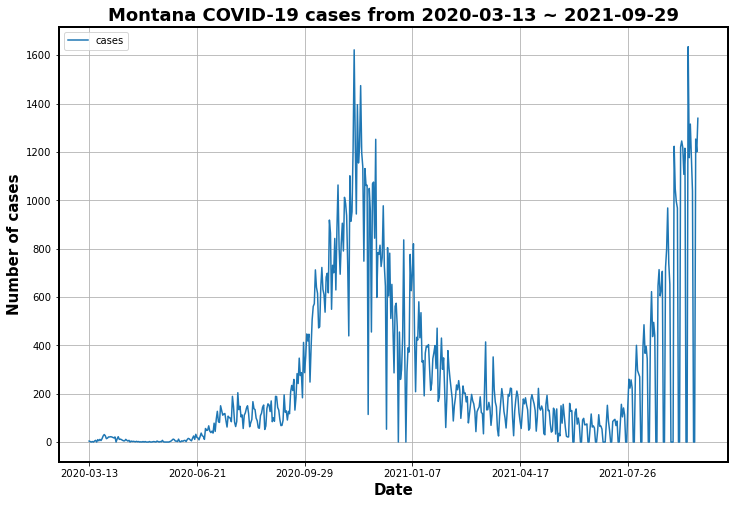

In [7]:
Montana_daily_cases.plot(title='Montana COVID-19 cases from 2020-03-13 ~ 2021-09-29',
                         figsize=(12,8), xlabel='Date', ylabel='Number of cases', grid=True);

In [ ]:
# new period 2020-09-09 ~ 2020-09-18

In [76]:
Montana_daily_cases[180:190].cases

date
2020-09-09     90
2020-09-10    195
2020-09-11    123
2020-09-12    129
2020-09-13     91
2020-09-14    127
2020-09-15    117
2020-09-16    206
2020-09-17    234
2020-09-18    213
Name: cases, dtype: int64

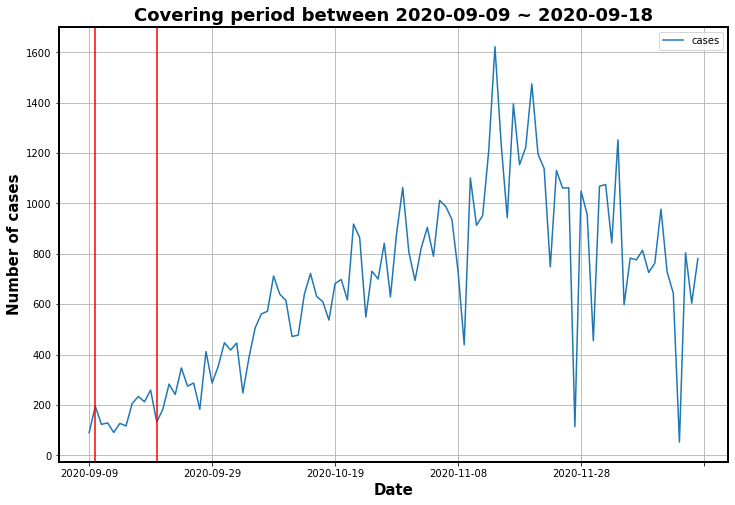

In [75]:
Montana_daily_cases[180:280].plot(title='Covering period between 2020-09-09 ~ 2020-09-18',
                         figsize=(12,8), xlabel='Date', ylabel='Number of cases', grid=True)
plt.axvline(1, c='r')
plt.axvline(11, c='r');

In [77]:
D = []

for i in Montana_daily_cases[180:190].cases:
    D.append(i)
    
𝛾 = 1/14

infection_0 = ((1 - 𝛾)**0)*D[0]
infection_1 = ((1 - 𝛾)**1)*D[0] + ((1 - 𝛾)**0)*D[1]
infection_2 = ((1 - 𝛾)**2)*D[0] + ((1 - 𝛾)**1)*D[1] + D[2]
infection_3 = ((1 - 𝛾)**3)*D[0] + ((1 - 𝛾)**2)*D[1] + ((1 - 𝛾)**1)*D[2] + D[3]
infection_4 = ((1 - 𝛾)**4)*D[0] + ((1 - 𝛾)**3)*D[1] + ((1 - 𝛾)**2)*D[2] + ((1 - 𝛾)**1)*D[3] + D[4]
infection_5 = ((1 - 𝛾)**5)*D[0] + ((1 - 𝛾)**4)*D[1] + ((1 - 𝛾)**3)*D[2] + ((1 - 𝛾)**2)*D[3] + ((1 - 𝛾)**1)*D[4] + D[5]
infection_6 = ((1 - 𝛾)**6)*D[0] + ((1 - 𝛾)**5)*D[1] + ((1 - 𝛾)**4)*D[2] + ((1 - 𝛾)**3)*D[3] + ((1 - 𝛾)**2)*D[4] + ((1 - 𝛾)**1)*D[5] + D[6]
infection_7 = ((1 - 𝛾)**7)*D[0] + ((1 - 𝛾)**6)*D[1] + ((1 - 𝛾)**5)*D[2] + ((1 - 𝛾)**4)*D[3] + ((1 - 𝛾)**3)*D[4] + ((1 - 𝛾)**2)*D[5] + ((1 - 𝛾)**1)*D[6] + D[7]
infection_8 = ((1 - 𝛾)**8)*D[0] + ((1 - 𝛾)**7)*D[1] + ((1 - 𝛾)**6)*D[2] + ((1 - 𝛾)**5)*D[3] + ((1 - 𝛾)**4)*D[4] + ((1 - 𝛾)**3)*D[5] + ((1 - 𝛾)**2)*D[6] + ((1 - 𝛾)**1)*D[7] + D[8]
infection_9 = ((1 - 𝛾)**9)*D[0] + ((1 - 𝛾)**8)*D[1] + ((1 - 𝛾)**7)*D[2] + ((1 - 𝛾)**6)*D[3] + ((1 - 𝛾)**5)*D[4] + ((1 - 𝛾)**4)*D[5] + ((1 - 𝛾)**3)*D[6] + ((1 - 𝛾)**2)*D[7] + ((1 - 𝛾)**1)*D[8] + D[9]

In [78]:
infections_list1 = []

infections_list1.extend((infection_0, infection_1, infection_2, infection_3, infection_4, infection_5, infection_6, infection_7, infection_8, infection_9))

In [79]:
infections_list1

[90.0,
 278.57142857142856,
 381.6734693877551,
 483.4110787172012,
 539.8817159516868,
 628.3187362408521,
 700.4388265093626,
 856.4074817586938,
 1029.2355187759301,
 1168.7186960062209]

In [80]:
N = 1084225

y_axis1 = []

for i in D:
    y_values = i / N
    y_axis1.append(y_values)

In [81]:
y_axis1

[8.300860061334133e-05,
 0.00017985196799557288,
 0.00011344508750489982,
 0.0001189789942124559,
 8.393091839793401e-05,
 0.00011713435864327054,
 0.00010791118079734372,
 0.00018999746362609237,
 0.00021582236159468744,
 0.00019645368811824115]

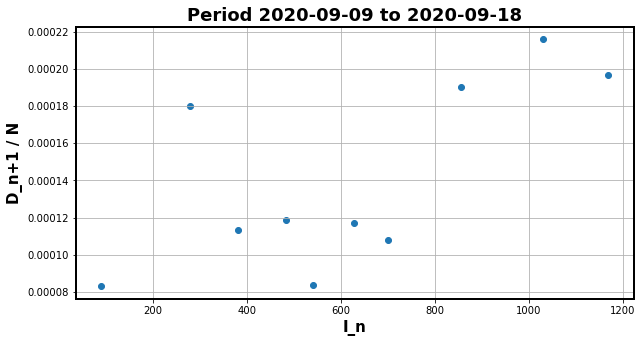

In [83]:
plt.xlabel('I_n')
plt.ylabel('D_n+1 / N')
plt.title('Period 2020-09-09 to 2020-09-18')
plt.scatter(infections_list1, y_axis1)
plt.grid();

In [84]:
# creating our matrices
X1 = np.matrix( [[xi,1] for xi in infections_list1])
Y1 = np.matrix( [[yi] for yi in y_axis1] )

In [85]:
# solve for our parameters `b` and `y` in our model `y = m*x + b`
# p will contain the parameters
p1 = (X1.T * X1).I * X1.T * Y1   # X.T = transpose of X
print(p1)                        # .I = inverse
                                 # p = (X.T * X).I * X.T * Y will work for
                                 # as many data points as we have

[[1.00355003e-07]
 [7.88683296e-05]]


In [86]:
m1 = p1.item(0) # our best slope
b1 = p1.item(1) # our best y-intercept

print(f"Our best slope (BETA): {m1}\nOur best y-int: {b1}")

Our best slope (BETA): 1.0035500282358069e-07
Our best y-int: 7.88683295710177e-05


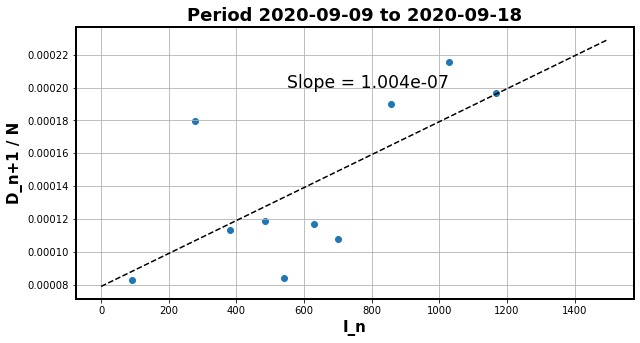

In [95]:
plt.xlabel('I_n')
plt.ylabel('D_n+1 / N')
plt.title('Period 2020-09-09 to 2020-09-18')
plt.scatter(infections_list1, y_axis1)

modelx1 = np.linspace(0, 1500, 100) # modelx is an array of test mass with 100 values
modely1 = m1 * modelx1 + b1         # modely is an array of temperature values for each test mass
plt.plot(modelx1, modely1, 'k--')
plt.text(550, 0.0002, 'Slope = 1.004e-07', size='xx-large')
plt.grid();

In [ ]:
#####

In [ ]:
# redoing this

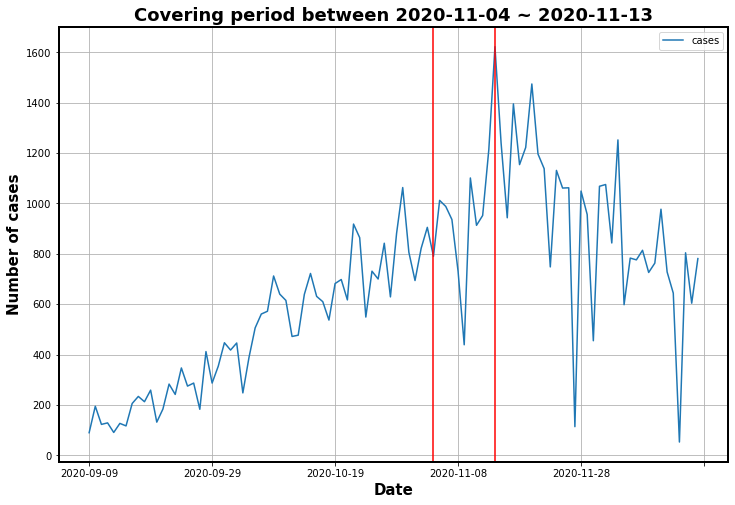

In [8]:
Montana_daily_cases[180:280].plot(title='Covering period between 2020-11-04 ~ 2020-11-13',
                         figsize=(12,8), xlabel='Date', ylabel='Number of cases', grid=True)
plt.axvline(56, c='r')
plt.axvline(66, c='r');

In [9]:
Montana_daily_cases[236:246].cases

date
2020-11-04     790
2020-11-05    1012
2020-11-06     988
2020-11-07     936
2020-11-08     731
2020-11-09     439
2020-11-10    1101
2020-11-11     913
2020-11-12     952
2020-11-13    1213
Name: cases, dtype: int64

In [10]:
D = []

for i in Montana_daily_cases[236:246].cases:
    D.append(i)
    
𝛾 = 1/14

infection_0 = ((1 - 𝛾)**0)*D[0]
infection_1 = ((1 - 𝛾)**1)*D[0] + ((1 - 𝛾)**0)*D[1]
infection_2 = ((1 - 𝛾)**2)*D[0] + ((1 - 𝛾)**1)*D[1] + D[2]
infection_3 = ((1 - 𝛾)**3)*D[0] + ((1 - 𝛾)**2)*D[1] + ((1 - 𝛾)**1)*D[2] + D[3]
infection_4 = ((1 - 𝛾)**4)*D[0] + ((1 - 𝛾)**3)*D[1] + ((1 - 𝛾)**2)*D[2] + ((1 - 𝛾)**1)*D[3] + D[4]
infection_5 = ((1 - 𝛾)**5)*D[0] + ((1 - 𝛾)**4)*D[1] + ((1 - 𝛾)**3)*D[2] + ((1 - 𝛾)**2)*D[3] + ((1 - 𝛾)**1)*D[4] + D[5]
infection_6 = ((1 - 𝛾)**6)*D[0] + ((1 - 𝛾)**5)*D[1] + ((1 - 𝛾)**4)*D[2] + ((1 - 𝛾)**3)*D[3] + ((1 - 𝛾)**2)*D[4] + ((1 - 𝛾)**1)*D[5] + D[6]
infection_7 = ((1 - 𝛾)**7)*D[0] + ((1 - 𝛾)**6)*D[1] + ((1 - 𝛾)**5)*D[2] + ((1 - 𝛾)**4)*D[3] + ((1 - 𝛾)**3)*D[4] + ((1 - 𝛾)**2)*D[5] + ((1 - 𝛾)**1)*D[6] + D[7]
infection_8 = ((1 - 𝛾)**8)*D[0] + ((1 - 𝛾)**7)*D[1] + ((1 - 𝛾)**6)*D[2] + ((1 - 𝛾)**5)*D[3] + ((1 - 𝛾)**4)*D[4] + ((1 - 𝛾)**3)*D[5] + ((1 - 𝛾)**2)*D[6] + ((1 - 𝛾)**1)*D[7] + D[8]
infection_9 = ((1 - 𝛾)**9)*D[0] + ((1 - 𝛾)**8)*D[1] + ((1 - 𝛾)**7)*D[2] + ((1 - 𝛾)**6)*D[3] + ((1 - 𝛾)**5)*D[4] + ((1 - 𝛾)**4)*D[5] + ((1 - 𝛾)**3)*D[6] + ((1 - 𝛾)**2)*D[7] + ((1 - 𝛾)**1)*D[8] + D[9]

In [11]:
infections_list1 = []

infections_list1.extend((infection_0, infection_1, infection_2, infection_3, infection_4, infection_5, infection_6, infection_7, infection_8, infection_9))

In [12]:
infections_list1

[790.0,
 1745.5714285714284,
 2608.887755102041,
 3358.5386297376094,
 3849.6430133277804,
 4013.6685123757957,
 4827.977904348953,
 5396.122339752599,
 5962.685029770272,
 6749.778956215252]

In [13]:
N = 1084225

y_axis1 = []

for i in D:
    y_values = i / N
    y_axis1.append(y_values)

In [14]:
y_axis1

[0.0007286310498282184,
 0.0009333855980077936,
 0.0009112499711775692,
 0.0008632894463787498,
 0.0006742143005372502,
 0.00040489750743618713,
 0.0010154718808365422,
 0.0008420761373331182,
 0.0008780465309322327,
 0.0011187714727109224]

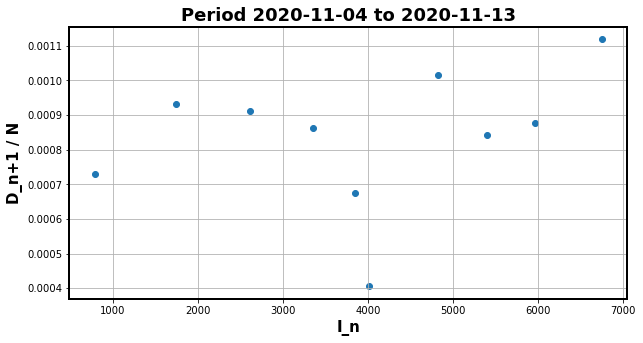

In [15]:
plt.xlabel('I_n')
plt.ylabel('D_n+1 / N')
plt.title('Period 2020-11-04 to 2020-11-13')
plt.scatter(infections_list1, y_axis1)
plt.grid();

In [16]:
# creating our matrices
X1 = np.matrix( [[xi,1] for xi in infections_list1])
Y1 = np.matrix( [[yi] for yi in y_axis1] )

In [17]:
# solve for our parameters `b` and `y` in our model `y = m*x + b`
# p will contain the parameters
p1 = (X1.T * X1).I * X1.T * Y1   # X.T = transpose of X
print(p1)                        # .I = inverse
                                 # p = (X.T * X).I * X.T * Y will work for
                                 # as many data points as we have

[[3.27255322e-08]
 [7.08382644e-04]]


In [18]:
m1 = p1.item(0) # our best slope
b1 = p1.item(1) # our best y-intercept

print(f"Our best slope (BETA): {m1}\nOur best y-int: {b1}")

Our best slope (BETA): 3.27255321732316e-08
Our best y-int: 0.0007083826441689216


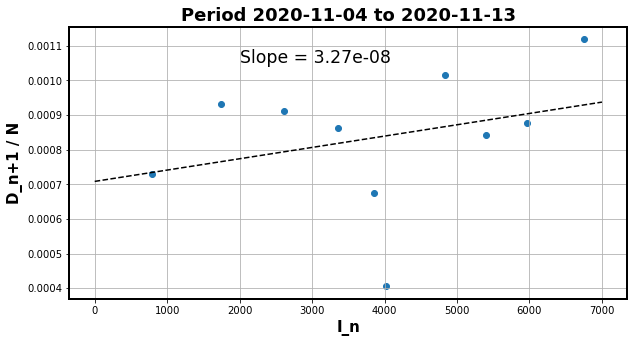

In [19]:
plt.xlabel('I_n')
plt.ylabel('D_n+1 / N')
plt.title('Period 2020-11-04 to 2020-11-13')
plt.scatter(infections_list1, y_axis1)

modelx1 = np.linspace(0, 7000, 100) # modelx is an array of test mass with 100 values
modely1 = m1 * modelx1 + b1         # modely is an array of temperature values for each test mass
plt.plot(modelx1, modely1, 'k--')
plt.text(2000, 0.00105, 'Slope = 3.27e-08', size='xx-large')
plt.grid();

<br>

### 2nd valley

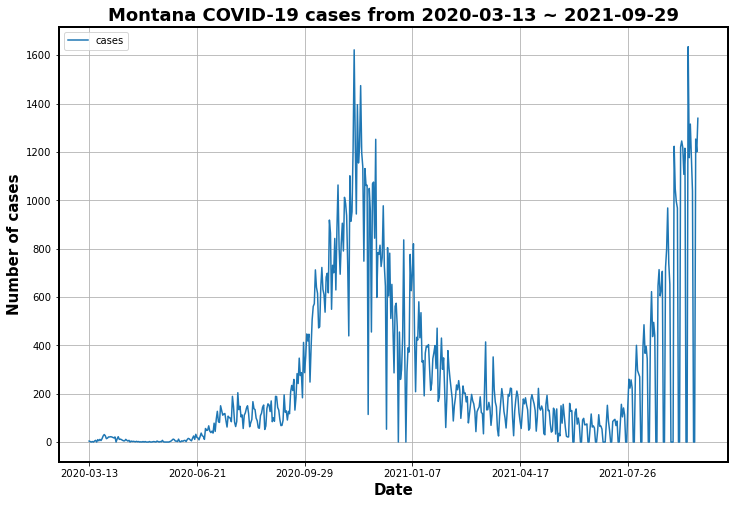

In [20]:
Montana_daily_cases.plot(title='Montana COVID-19 cases from 2020-03-13 ~ 2021-09-29',
                         figsize=(12,8), xlabel='Date', ylabel='Number of cases', grid=True);

In [21]:
# 2021-07-26 to 2021-08-04

In [22]:
Montana_daily_cases[500:510].cases

date
2021-07-26    152
2021-07-27    260
2021-07-28    223
2021-07-29    257
2021-07-30    224
2021-07-31      0
2021-08-01      0
2021-08-02    266
2021-08-03    400
2021-08-04    296
Name: cases, dtype: int64

In [23]:
len(Montana_daily_cases)

566

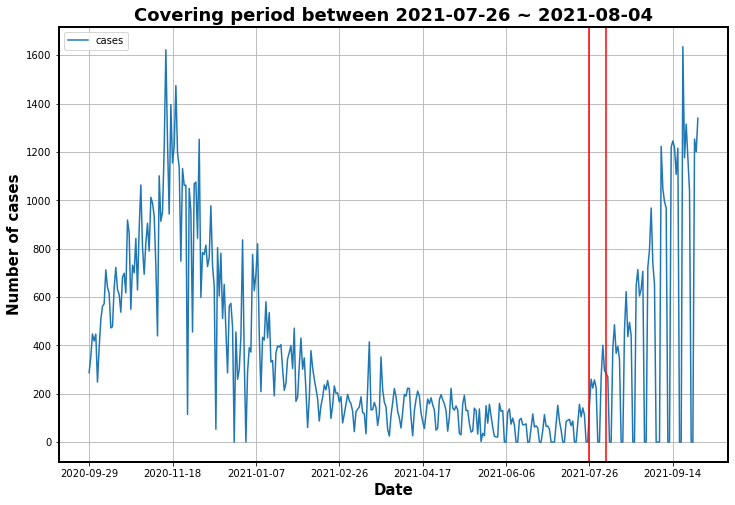

In [24]:
Montana_daily_cases[200:].plot(title='Covering period between 2021-07-26 ~ 2021-08-04',
                         figsize=(12,8), xlabel='Date', ylabel='Number of cases', grid=True)
plt.axvline(300, c='r')
plt.axvline(310, c='r');

In [25]:
D2 = []

for i in Montana_daily_cases[500:510].cases:
    D2.append(i)
    
𝛾 = 1/14

infection_00 = ((1 - 𝛾)**0)*D2[0]
infection_11 = ((1 - 𝛾)**1)*D2[0] + ((1 - 𝛾)**0)*D2[1]
infection_22 = ((1 - 𝛾)**2)*D2[0] + ((1 - 𝛾)**1)*D2[1] + D2[2]
infection_33 = ((1 - 𝛾)**3)*D2[0] + ((1 - 𝛾)**2)*D2[1] + ((1 - 𝛾)**1)*D2[2] + D2[3]
infection_44 = ((1 - 𝛾)**4)*D2[0] + ((1 - 𝛾)**3)*D2[1] + ((1 - 𝛾)**2)*D2[2] + ((1 - 𝛾)**1)*D2[3] + D2[4]
infection_55 = ((1 - 𝛾)**5)*D2[0] + ((1 - 𝛾)**4)*D2[1] + ((1 - 𝛾)**3)*D2[2] + ((1 - 𝛾)**2)*D2[3] + ((1 - 𝛾)**1)*D2[4] + D2[5]
infection_66 = ((1 - 𝛾)**6)*D2[0] + ((1 - 𝛾)**5)*D2[1] + ((1 - 𝛾)**4)*D2[2] + ((1 - 𝛾)**3)*D2[3] + ((1 - 𝛾)**2)*D2[4] + ((1 - 𝛾)**1)*D2[5] + D2[6]
infection_77 = ((1 - 𝛾)**7)*D2[0] + ((1 - 𝛾)**6)*D2[1] + ((1 - 𝛾)**5)*D2[2] + ((1 - 𝛾)**4)*D2[3] + ((1 - 𝛾)**3)*D2[4] + ((1 - 𝛾)**2)*D2[5] + ((1 - 𝛾)**1)*D2[6] + D2[7]
infection_88 = ((1 - 𝛾)**8)*D2[0] + ((1 - 𝛾)**7)*D2[1] + ((1 - 𝛾)**6)*D2[2] + ((1 - 𝛾)**5)*D2[3] + ((1 - 𝛾)**4)*D2[4] + ((1 - 𝛾)**3)*D2[5] + ((1 - 𝛾)**2)*D2[6] + ((1 - 𝛾)**1)*D2[7] + D2[8]
infection_99 = ((1 - 𝛾)**9)*D2[0] + ((1 - 𝛾)**8)*D2[1] + ((1 - 𝛾)**7)*D2[2] + ((1 - 𝛾)**6)*D2[3] + ((1 - 𝛾)**5)*D2[4] + ((1 - 𝛾)**4)*D2[5] + ((1 - 𝛾)**3)*D2[6] + ((1 - 𝛾)**2)*D2[7] + ((1 - 𝛾)**1)*D2[8] + D2[9]

In [26]:
infections_list2 = []

infections_list2.extend((infection_00, infection_11, infection_22, infection_33, infection_44, infection_55, infection_66, infection_77, infection_88, infection_99))

In [27]:
infections_list2

[152.0,
 401.1428571428571,
 595.4897959183673,
 809.9548104956268,
 976.1008954602248,
 906.3794029273517,
 841.6380170039695,
 1047.5210157894003,
 1372.6980860901574,
 1570.6482227980034]

In [28]:
N = 1104271

y_axis2 = []

for i in D2:
    y_values = i / N
    y_axis2.append(y_values)

In [29]:
y_axis2

[0.000137647370980493,
 0.00023544945036136963,
 0.00020194318242532856,
 0.00023273272593412304,
 0.00020284875723441075,
 0.0,
 0.0,
 0.00024088289921586278,
 0.00036222992363287634,
 0.0002680501434883285]

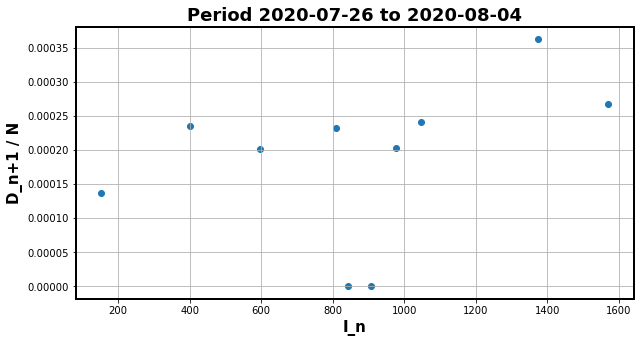

In [30]:
plt.xlabel('I_n')
plt.ylabel('D_n+1 / N')
plt.title('Period 2020-07-26 to 2020-08-04')
plt.scatter(infections_list2, y_axis2)
plt.grid();

In [31]:
# creating our matrices
X2 = np.matrix( [[xi,1] for xi in infections_list2])
Y2 = np.matrix( [[yi] for yi in y_axis2] )

# solve for our parameters `b` and `y` in our model `y = m*x + b`
# p will contain the parameters
p2 = (X2.T * X2).I * X2.T * Y2   # X.T = transpose of X
print(p2)                        # .I = inverse
                                 # p = (X.T * X).I * X.T * Y will work for
                                 # as many data points as we have

[[1.00155946e-07]
 [1.01307453e-04]]


In [32]:
m2 = p2.item(0) # our best slope
b2 = p2.item(1) # our best y-intercept

print(f"Our best slope (BETA): {m2}\nOur best y-int: {b2}")

Our best slope (BETA): 1.0015594593368251e-07
Our best y-int: 0.00010130745344541895


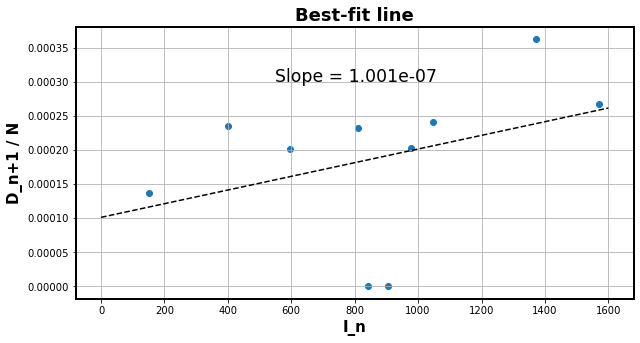

In [33]:
plt.xlabel('I_n')
plt.ylabel('D_n+1 / N')
plt.title('Best-fit line')
plt.scatter(infections_list2, y_axis2)

modelx2 = np.linspace(0, 1600, 100) # modelx is an array of test mass with 100 values
modely2 = m2 * modelx2 + b2         # modely is an array of temperature values for each test mass
plt.plot(modelx2, modely2, 'k--')
plt.text(550, 0.00030, 'Slope = 1.001e-07', size='xx-large')
plt.grid();

<br>

## Discrete Time SIR-model matrix

### Numpy Linalg

In [34]:
# 1st valley
v1 = np.array([[1, -0.036, 0],
               [0, 0.965, 0],
               [0, 0.071, 1]])
v1

array([[ 1.   , -0.036,  0.   ],
       [ 0.   ,  0.965,  0.   ],
       [ 0.   ,  0.071,  1.   ]])

In [35]:
# eigenvalues/eigenvectors
np.linalg.eig(v1)

(array([1.   , 1.   , 0.965]),
 array([[ 1.        ,  0.        ,  0.41398458],
        [ 0.        ,  0.        ,  0.40248501],
        [ 0.        ,  1.        , -0.81646959]]))

In [36]:
# inverse
np.linalg.inv(v1)

array([[ 1.        ,  0.0373057 ,  0.        ],
       [ 0.        ,  1.03626943,  0.        ],
       [ 0.        , -0.07357513,  1.        ]])

In [37]:
# diagonal
v1.diagonal()

array([1.   , 0.965, 1.   ])

In [38]:
# 2nd valley
v2 = np.array([[1, -0.111, 0],
               [0, 1.040, 0],
               [0, 0.071, 1]])
v2

array([[ 1.   , -0.111,  0.   ],
       [ 0.   ,  1.04 ,  0.   ],
       [ 0.   ,  0.071,  1.   ]])

In [39]:
# eigenvalues/eigenvectors
np.linalg.eig(v2)

(array([1.  , 1.  , 1.04]),
 array([[ 1.        ,  0.        , -0.80608513],
        [ 0.        ,  0.        ,  0.29048113],
        [ 0.        ,  1.        ,  0.515604  ]]))

In [40]:
# inverse
np.linalg.inv(v2)

array([[ 1.        ,  0.10673077,  0.        ],
       [ 0.        ,  0.96153846,  0.        ],
       [ 0.        , -0.06826923,  1.        ]])

### Sympy

In [ ]:
#######

In [102]:
Msample = Matrix([[1, -0.109, 0],
                  [0, 1.037, 0],
                  [0, 0.071, 1]])

In [103]:
Msample

Matrix([
[1, -0.109, 0],
[0,  1.037, 0],
[0,  0.071, 1]])

In [104]:
Msample.inv()

Matrix([
[1.0,  0.105110896817743,   0],
[  0,  0.964320154291225,   0],
[  0, -0.068466730954677, 1.0]])

In [105]:
Qsample, Dsample = Msample.diagonalize()

In [106]:
Qsample

Matrix([
[1.0,                1.0, 0.0325704225352112],
[  0, -0.339449541284403, 2.107289714702e-64],
[  0, -0.651376146788991,   1.12764050147877]])

In [108]:
Qsample.inv()

Matrix([
[1.0,  3.00137141170214, -0.0288836934222379],
[  0, -2.94594594594595,                   0],
[  0, -1.70171159727102,    0.88680745209898]])

In [107]:
Dsample

Matrix([
[1.0,     0,   0],
[  0, 1.037,   0],
[  0,     0, 1.0]])

In [110]:
Qsample*Dsample*Qsample.inv() # checks out

Matrix([
[1.0, -0.109000000000001, -1.38777878078145e-17],
[  0,              1.037,  1.86876022272927e-64],
[  0,              0.071,                   1.0]])

In [ ]:
######

In [41]:
# getting our matrices in a sympy objects

In [42]:
M1 = Matrix([[1, -0.036, 0], 
             [0, 0.965, 0], 
             [0, 0.071, 1]])
M1

Matrix([
[1, -0.036, 0],
[0,  0.965, 0],
[0,  0.071, 1]])

In [43]:
# inverse
M1.inv()  # same result as numpy linalg

Matrix([
[1.0,  0.0373056994818653,   0],
[  0,    1.03626943005181,   0],
[  0, -0.0735751295336788, 1.0]])

In [44]:
# eigenvalues
M1.eigenvals()

{1.00000000000000: 2, 0.965000000000000: 1}

In [45]:
# M1 has eigenvalues 𝜆1 = 1 w/ (algebraic) multiplicity = 2 and 
#                    𝜆2 = 0.965 w/ (algebraic) multiplicity = 1
# makes sense because using the triangle rule, 
# the eigenvalues are the diagonal entries of our matrix `M1`

In [46]:
# eigenvectors
M1.eigenvects()

[(1.00000000000000,
  1,
  [Matrix([
   [1.0],
   [  0],
   [  0]])]),
 (0.965000000000000,
  1,
  [Matrix([
   [ 0.454786228776175],
   [ 0.442153277976838],
   [-0.896939506753012]])]),
 (1.00000000000000,
  1,
  [Matrix([
   [                   0],
   [6.31526365601142e-65],
   [   -1.11490239026272]])])]

In [47]:
# does not match with 
# https://www.emathhelp.net/calculators/linear-algebra/diagonalize-matrix-calculator/?i=%5B%5B1%2C-0.036%2C0%5D%2C%5B0%2C0.965%2C0%5D%2C%5B0%2C0.071%2C1%5D%5D

In [48]:
# eigenvects() returns (eigenvalue, algebraic_multiplicity, [eigenvectors])

In [49]:
# M1 has eigenvectors v1 = [1, 0, 0]            --->  𝜆1 = 1 w/ (geometric) multiplicity = 1 
#                     v2 = [0.455, 0.442, -0.9] --->  𝜆2 = 0.965 w/ (geometric) multiplicity = 1 
#                     v3 = [0, 0, -1.115]       --->  𝜆3 = 1 w/ (geometric) multiplicity = 1 

In [50]:
# why is v1 and v3 different if they both correspond to the same eigenvalue 𝜆 = 1 ??

In [51]:
# To diagonalize a matrix, use diagonalize. diagonalize returns a tuple (P, D), where D is diagonal and M = PDP^-1.

In [52]:
Q1, D1 = M1.diagonalize()

In [53]:
Q1

Matrix([
[1.0,  0.454786228776175,                    0],
[  0,  0.442153277976838, 6.31526365601142e-65],
[  0, -0.896939506753012,    -1.11490239026272]])

In [54]:
# inverse Q
Q1.inv()

Matrix([
[1.0, -1.02857142857143, -6.27736511253071e-17],
[  0,  2.26165913453295,                     0],
[  0, -1.81950585655611,    -0.896939506753013]])

In [55]:
# diagonal matrix
D1

Matrix([
[1.0,     0,   0],
[  0, 0.965,   0],
[  0,     0, 1.0]])

In [56]:
Q1*D1*Q1.inv() == M1 # False only by approximation

False

In [57]:
(Q1*D1)*Q1.inv() # TRUE

Matrix([
[1.0, -0.0360000000000004, -6.27736511253071e-17],
[  0,               0.965, -5.66440946863811e-65],
[  0,  0.0710000000000002,                   1.0]])

In [58]:
M2 = Matrix([[1, -0.111, 0], 
             [0, 1.04, 0], 
             [0, 0.071, 1]])
M2

Matrix([
[1, -0.111, 0],
[0,   1.04, 0],
[0,  0.071, 1]])

In [59]:
# inverse
M2.inv()  # same result as numpy linalg

Matrix([
[1.0,   0.106730769230769,   0],
[  0,   0.961538461538461,   0],
[  0, -0.0682692307692308, 1.0]])

In [60]:
# eigenvalues
M2.eigenvals()

{1.00000000000000: 2, 1.04000000000000: 1}

In [61]:
# eigenvectors
M2.eigenvects()

[(1.00000000000000,
  1,
  [Matrix([
   [1.0],
   [  0],
   [  0]])]),
 (1.04000000000000,
  1,
  [Matrix([
   [               1.0],
   [-0.360360360360361],
   [ -0.63963963963964]])]),
 (1.00000000000000,
  1,
  [Matrix([
   [  0.0704225352112677],
   [1.16168834272942e-64],
   [    1.14777930883827]])])]

In [62]:
Q2, D2 = M2.diagonalize()

In [63]:
Q2

Matrix([
[1.0,                1.0,   0.0704225352112677],
[  0, -0.360360360360361, 1.16168834272942e-64],
[  0,  -0.63963963963964,     1.14777930883827]])

In [64]:
# inverse Q
Q2.inv()

Matrix([
[1.0,  2.88390595346811, -0.061355466742597],
[  0,            -2.775,                  0],
[  0, -1.54646453924716,  0.871247627744877]])

In [65]:
# diagonal matrix of the 2nd valley
D2

Matrix([
[1.0,    0,   0],
[  0, 1.04,   0],
[  0,    0, 1.0]])

### Plots of eigenspace

In [100]:
# using the values we got from `matrixcalc` & `Symbolab`

# 1st valley
x1 = [1, 0, -1.535]
y1 = [0, 0, 0.521]
z1 = [0, 1, 1]

# 2nd valley
x2 = [1, 0, -1.563]
y2 = [0, 0, 0.563]
z2 = [0, 1, 1]

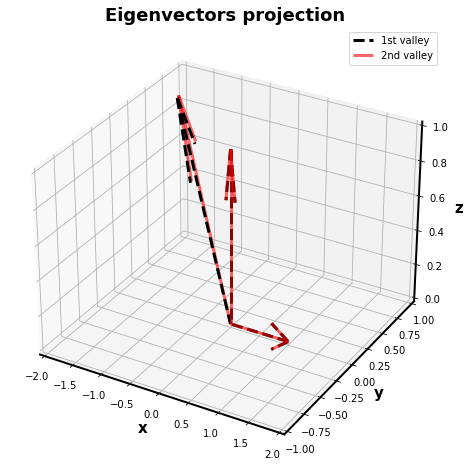

In [101]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection = '3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Eigenvectors projection')

# starting point == origin
start = [0, 0, 0]

ax.quiver(start[0], start[1], start[2], x1[0], y1[0], z1[0], color='k', ls='--', zorder=0, label='1st valley', lw=3)
ax.quiver(start[0], start[1], start[2], x1[1], y1[1], z1[1], color='k', ls='--', zorder=0, lw=3)
ax.quiver(start[0], start[1], start[2], x1[2], y1[2], z1[2], color='k', ls='--', zorder=0, lw=3)

ax.quiver(start[0], start[1], start[2], x2[0], y2[0], z2[0], color='r', alpha=0.6, zorder=1, label='2nd valley', lw=3)
ax.quiver(start[0], start[1], start[2], x2[1], y2[1], z2[1], color='r', alpha=0.6, zorder=1, lw=3)
ax.quiver(start[0], start[1], start[2], x2[2], y2[2], z2[2], color='r', alpha=0.6, zorder=1, lw=3)
plt.legend();

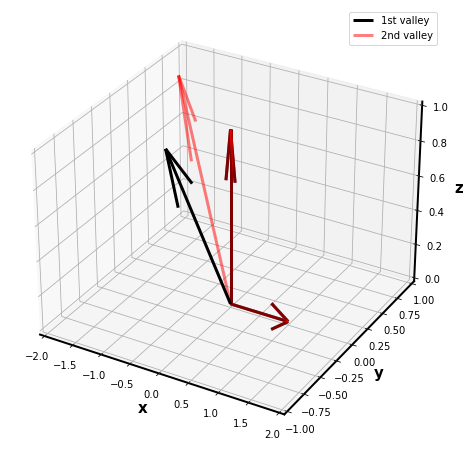

In [68]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection = '3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# starting point == origin
start = [0, 0, 0]

ax.quiver(start[0], start[1], start[2], x1[0], y1[0], z1[0], color='k', zorder=0, label='1st valley', lw=3)
ax.quiver(start[0], start[1], start[2], x1[1], y1[1], z1[1], color='k', zorder=0, lw=3)
ax.quiver(start[0], start[1], start[2], x1[2], y1[2], z1[2], color='k', zorder=0, lw=3)

ax.quiver(start[0], start[1], start[2], x2[0], y2[0], z2[0], color='r', alpha=0.5, zorder=1, label='2nd valley', lw=3)
ax.quiver(start[0], start[1], start[2], x2[1], y2[1], z2[1], color='r', alpha=0.5, zorder=1, lw=3)
ax.quiver(start[0], start[1], start[2], x2[2], y2[2], z2[2], color='r', alpha=0.5, zorder=1, lw=3)
plt.legend();

#ax.view_init(10, 15);

### Number of Population needs to be vaccination to slow the growth of infection

In [111]:
# initial population (in year 2020)
S0 = 1084225

print("Initial population (2020) = 1,084,225")
print("Initial 𝜆 = 1.037\n")

for i in range(5, 105, 5):
    Sn = S0 - S0*(i*0.01)
    𝛾 = 1/14
    𝛽 = 1.001e-07
    𝜆 = 1 - 𝛾 + 𝛽*(Sn)
    print(f'{ i}% decrease = {int(Sn)} \t\t𝜆 =  {𝜆}')

Initial population (2020) = 1,084,225
Initial 𝜆 = 1.037

5% decrease = 1030013 		𝜆 =  1.0316758049464285
10% decrease = 975802 		𝜆 =  1.0262492588214287
15% decrease = 921591 		𝜆 =  1.0208227126964287
20% decrease = 867380 		𝜆 =  1.0153961665714286
25% decrease = 813168 		𝜆 =  1.0099696204464286
30% decrease = 758957 		𝜆 =  1.0045430743214285
35% decrease = 704746 		𝜆 =  0.9991165281964286
40% decrease = 650535 		𝜆 =  0.9936899820714286
45% decrease = 596323 		𝜆 =  0.9882634359464286
50% decrease = 542112 		𝜆 =  0.9828368898214286
55% decrease = 487901 		𝜆 =  0.9774103436964287
60% decrease = 433690 		𝜆 =  0.9719837975714286
65% decrease = 379478 		𝜆 =  0.9665572514464286
70% decrease = 325267 		𝜆 =  0.9611307053214286
75% decrease = 271056 		𝜆 =  0.9557041591964286
80% decrease = 216845 		𝜆 =  0.9502776130714286
85% decrease = 162633 		𝜆 =  0.9448510669464286
90% decrease = 108422 		𝜆 =  0.9394245208214286
95% decrease = 54211 		𝜆 =  0.9339979746964286
100% decrease = 0 		𝜆 =  0.92857

In [69]:
# initial population (in year 2021)
S0 = 1104271

print("Initial population (2021) = 1,104,271")
print("Initial 𝜆 = 1.04\n")

for i in range(5, 105, 5):
    Sn = S0 - S0*(i*0.01)
    𝛾 = 1/14
    𝛽 = 1.001e-07
    𝜆 = 1 - 𝛾 + 𝛽*(Sn)
    print(f'{ i}% decrease = {int(Sn)} \t\t𝜆 =  {𝜆}')

Initial population (2021) = 1,104,271
Initial 𝜆 = 1.04

5% decrease = 1049057 		𝜆 =  1.0335820793164285
10% decrease = 993843 		𝜆 =  1.0280552029614287
15% decrease = 938630 		𝜆 =  1.0225283266064287
20% decrease = 883416 		𝜆 =  1.0170014502514286
25% decrease = 828203 		𝜆 =  1.0114745738964286
30% decrease = 772989 		𝜆 =  1.0059476975414285
35% decrease = 717776 		𝜆 =  1.0004208211864285
40% decrease = 662562 		𝜆 =  0.9948939448314286
45% decrease = 607349 		𝜆 =  0.9893670684764286
50% decrease = 552135 		𝜆 =  0.9838401921214286
55% decrease = 496921 		𝜆 =  0.9783133157664285
60% decrease = 441708 		𝜆 =  0.9727864394114286
65% decrease = 386494 		𝜆 =  0.9672595630564286
70% decrease = 331281 		𝜆 =  0.9617326867014286
75% decrease = 276067 		𝜆 =  0.9562058103464286
80% decrease = 220854 		𝜆 =  0.9506789339914286
85% decrease = 165640 		𝜆 =  0.9451520576364286
90% decrease = 110427 		𝜆 =  0.9396251812814286
95% decrease = 55213 		𝜆 =  0.9340983049264285
100% decrease = 0 		𝜆 =  0.928571